In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from pandas.api.types import CategoricalDtype

In [3]:
wego_df = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")
wego_df.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [4]:
wego_df

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [5]:
wego_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [6]:
wego_df['DATE_1'] = pd.to_datetime(wego_df['DATE'])

In [7]:
wego_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                350329 non-null  int64         
 1   SERVICE_ABBR               350329 non-null  int64         
 2   ADHERENCE_ID               350329 non-null  int64         
 3   DATE                       350329 non-null  object        
 4   ROUTE_ABBR                 350329 non-null  int64         
 5   BLOCK_ABBR                 350329 non-null  int64         
 6   OPERATOR                   350329 non-null  int64         
 7   TRIP_ID                    350329 non-null  int64         
 8   OVERLOAD_ID                350329 non-null  int64         
 9   ROUTE_DIRECTION_NAME       350329 non-null  object        
 10  TIME_POINT_ABBR            350329 non-null  object        
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64 

In [8]:
day_order = pd.Categorical(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered = True)

In [9]:
wego_df['DAY'] = wego_df['DATE_1'].dt.day_name()
wego_days_of_the_week = wego_df['DAY'].value_counts().reset_index()
wego_days_of_the_week

,DAY,count
0,Wednesday,58527
1,Friday,58473
2,Thursday,58456
3,Tuesday,58432
4,Monday,49116
5,Saturday,37497
6,Sunday,29828


In [10]:
wego_days_of_the_week = wego_days_of_the_week.set_index('DAY').reindex(day_order).reset_index()
wego_days_of_the_week.reset_index(drop = True)

,DAY,count
0,Monday,49116
1,Tuesday,58432
2,Wednesday,58527
3,Thursday,58456
4,Friday,58473
5,Saturday,37497
6,Sunday,29828


C:\Users\Jeremy\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


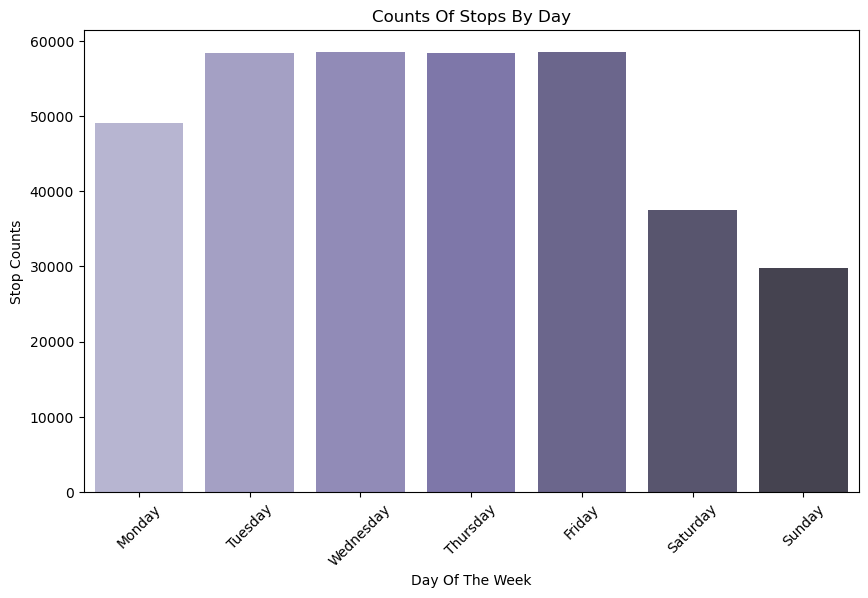

In [11]:

plt.figure(figsize=(10, 6))
sns.barplot(data=wego_days_of_the_week,
            x='DAY',
            y='count',
            palette='Purples_d',
            order= wego_days_of_the_week.DAY)  
plt.xticks(rotation=45)  
plt.xlabel('Day Of The Week')
plt.ylabel('Stop Counts')
plt.title('Counts Of Stops By Day')
plt.savefig("count_of_stops_by_day.png")
plt.show()

In [12]:
wego_monday = wego_df.loc[wego_df.DAY == 'Monday'] ##49116

In [13]:
## wego_monday[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT' ]].value_counts()

In [14]:
wego_monday['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    47451
1     1665
Name: count, dtype: int64

In [15]:
(1665/49116)*100

3.389934033716101

In [16]:
wego_monday['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    43111
1     6005
Name: count, dtype: int64

In [17]:
(6005/49116)*100

12.226158481961072

In [18]:
wego_monday['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    40319
0     8797
Name: count, dtype: int64

In [19]:
(40319/49116)*100

82.08933952276244

In [20]:
wego_tuesday = wego_df.loc[wego_df.DAY == 'Tuesday'] ##58432

In [21]:
wego_tuesday['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    56747
1     1685
Name: count, dtype: int64

In [22]:
(1685/58432)*100

2.883693866374589

In [23]:
wego_tuesday['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    48845
1     9587
Name: count, dtype: int64

In [24]:
(9587/58432)*100

16.407105695509312

In [25]:
wego_tuesday['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    45502
0    12930
Name: count, dtype: int64

In [26]:
(45502/58432)*100

77.87171412924425

In [27]:
wego_wednesday = wego_df.loc[wego_df.DAY == 'Wednesday'] ##58527

In [28]:
wego_wednesday['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    56892
1     1635
Name: count, dtype: int64

In [29]:
(1635/58527)*100

2.793582449126044

In [30]:
wego_wednesday['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    48230
1    10297
Name: count, dtype: int64

In [31]:
(10297/58527)*100

17.59358928357852

In [32]:
wego_wednesday['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    45009
0    13518
Name: count, dtype: int64

In [33]:
(45009/58527)*100

76.90296786098723

In [34]:
wego_thursday = wego_df.loc[wego_df.DAY == 'Thursday'] ##58432

In [35]:
wego_thursday['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    56886
1     1570
Name: count, dtype: int64

In [36]:
(1570/58432)*100

2.6868838992332966

In [37]:
wego_thursday['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    47789
1    10667
Name: count, dtype: int64

In [38]:
(10667/58432)*100

18.25540799561884

In [39]:
wego_thursday['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    44030
0    14426
Name: count, dtype: int64

In [40]:
(44030/58432)*100

75.35254654983571

In [41]:
wego_friday = wego_df.loc[wego_df.DAY == 'Friday'] ##58473

In [42]:
wego_friday['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    56921
1     1552
Name: count, dtype: int64

In [43]:
(1552/58473)*100

2.654216475980367

In [44]:
wego_friday['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    46084
1    12389
Name: count, dtype: int64

In [45]:
(12389/58473)*100

21.187556650077813

In [46]:
wego_friday['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    41973
0    16500
Name: count, dtype: int64

In [47]:
(41973/58473)*100

71.78184803242522

In [48]:
wego_saturday = wego_df.loc[wego_df.DAY == 'Saturday'] ##37497

In [49]:
wego_saturday['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    36676
1      821
Name: count, dtype: int64

In [50]:
(821/37497)*100

2.189508494012854

In [51]:
wego_saturday['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    30750
1     6747
Name: count, dtype: int64

In [52]:
(6747/37497)*100

17.993439475158013

In [53]:
wego_saturday['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    28962
0     8535
Name: count, dtype: int64

In [54]:
(28962/37497)*100

77.23817905432433

In [55]:
wego_sunday = wego_df.loc[wego_df.DAY == 'Sunday'] ##29828

In [56]:
wego_sunday['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    28981
1      847
Name: count, dtype: int64

In [57]:
(847/29828)*100

2.839613785704707

In [58]:
wego_sunday['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    26482
1     3346
Name: count, dtype: int64

In [59]:
(3346/29828)*100

11.217647847659917

In [60]:
wego_sunday['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    24253
0     5575
Name: count, dtype: int64

In [61]:
(24253/29828)*100

81.30950784497787

In [62]:
data = [['Monday', 3.38], ['Tuesday', 2.88], ['Wednesday', 2.79], ['Thursday', 2.68], ['Friday', 2.65], ['Saturday', 2.18], ['Sunday', 2.83]]
adjusted_early_count = pd.DataFrame(data, columns=['Day', 'Adjusted Early Count'])
adjusted_early_count

,Day,Adjusted Early Count
0,Monday,3.38
1,Tuesday,2.88
2,Wednesday,2.79
3,Thursday,2.68
4,Friday,2.65
5,Saturday,2.18
6,Sunday,2.83


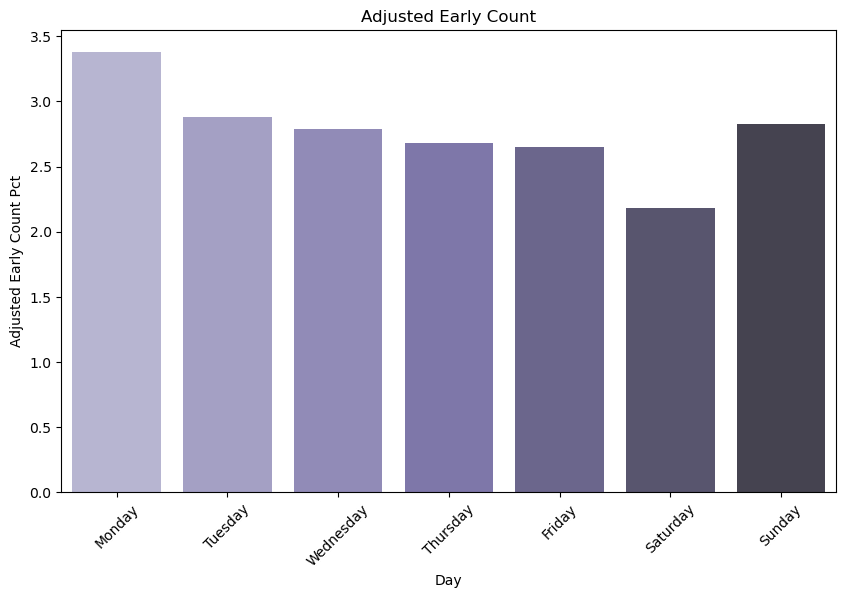

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(data=adjusted_early_count,
            x='Day',
            y='Adjusted Early Count',
            palette='Purples_d')  
plt.xticks(rotation=45)  
plt.xlabel('Day')
plt.ylabel('Adjusted Early Count Pct')
plt.title('Adjusted Early Count')
plt.show()

In [64]:
data = [['Monday', 12.22], ['Tuesday', 16.40], ['Wednesday', 17.59], ['Thursday', 18.25], ['Friday', 21.18], ['Saturday', 17.99], ['Sunday', 11.21]]
adjusted_late_count = pd.DataFrame(data, columns=['Day', 'Adjusted Late Count'])
adjusted_late_count

,Day,Adjusted Late Count
0,Monday,12.22
1,Tuesday,16.40
2,Wednesday,17.59
3,Thursday,18.25
4,Friday,21.18
5,Saturday,17.99
6,Sunday,11.21


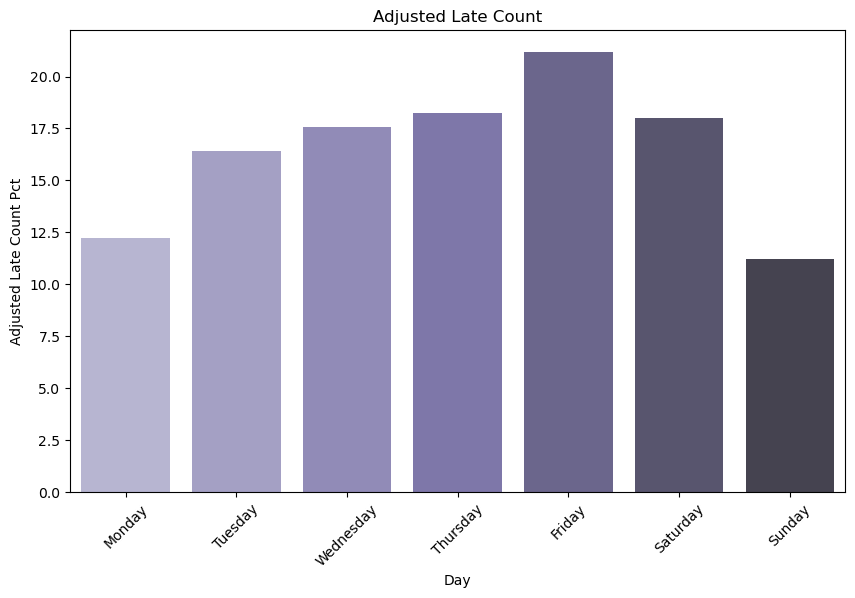

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(data=adjusted_late_count,
            x='Day',
            y='Adjusted Late Count',
            palette='Purples_d')  
plt.xticks(rotation=45)  
plt.xlabel('Day')
plt.ylabel('Adjusted Late Count Pct')
plt.title('Adjusted Late Count')
plt.show()

In [66]:
data = [['Monday', 82.08], ['Tuesday', 77.87], ['Wednesday', 76.90], ['Thursday', 75.35], ['Friday', 71.78], ['Saturday', 77.23], ['Sunday', 81.30]]
adjusted_ontime_count = pd.DataFrame(data, columns=['Day', 'Adjusted Ontime Count'])
adjusted_ontime_count

,Day,Adjusted Ontime Count
0,Monday,82.08
1,Tuesday,77.87
2,Wednesday,76.90
3,Thursday,75.35
4,Friday,71.78
5,Saturday,77.23
6,Sunday,81.30


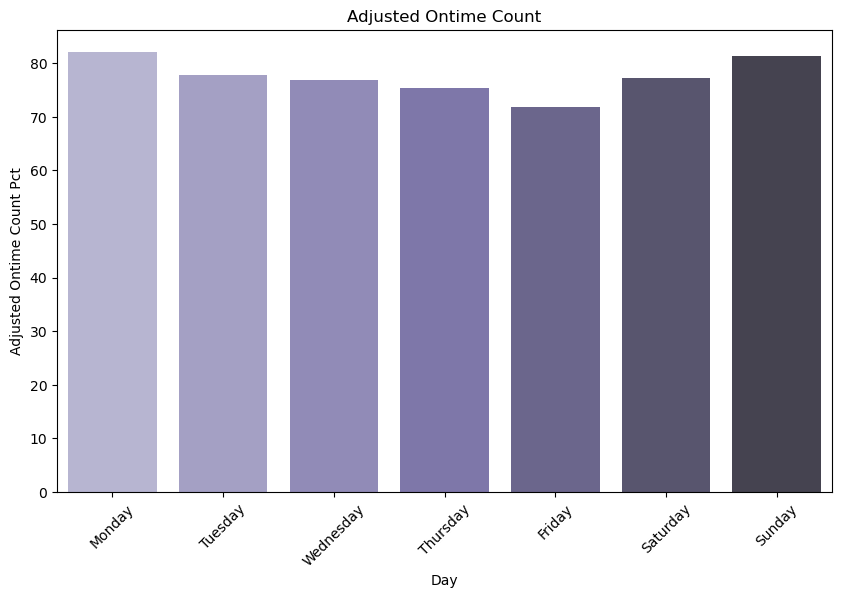

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(data=adjusted_ontime_count,
            x='Day',
            y='Adjusted Ontime Count',
            palette='Purples_d')  
plt.xticks(rotation=45)  
plt.xlabel('Day')
plt.ylabel('Adjusted Ontime Count Pct')
plt.title('Adjusted Ontime Count')
plt.show()

### Break out by 1s, 2s, and 3s

In [69]:
wego_df_weekdays = wego_df.loc[wego_df.SERVICE_ABBR == 1]
wego_df_weekdays

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,6.500000,NaN,2023-08-01,Tuesday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01,Tuesday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,2023-08-01,Tuesday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,0.000000,NaN,2023-08-01,Tuesday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,12.866666,5.0,2023-08-01,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346166,120230929,1,100386592,2023-09-29,50,9302,2423,354069,0,TO DOWNTOWN,...,0,1,0,0,NaN,0,3.183333,NaN,2023-09-29,Friday
346167,120230929,1,100386719,2023-09-29,50,9950,2530,354098,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,36.883333,NaN,2023-09-29,Friday
346168,120230929,1,100386720,2023-09-29,50,9950,2530,354098,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,4.416666,NaN,2023-09-29,Friday
346169,120230929,1,100386749,2023-09-29,56,9975,3120,354106,0,TO DOWNTOWN,...,0,1,0,0,0.0,0,10.433333,NaN,2023-09-29,Friday


In [70]:
wego_df_saturdays = wego_df.loc[wego_df.SERVICE_ABBR == 2]
wego_df_saturdays

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY
25841,120230805,2,99581530,2023-08-05,22,2200,2441,349972,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,13.283333,NaN,2023-08-05,Saturday
25842,120230805,2,99581531,2023-08-05,22,2200,2441,349972,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,2023-08-05,Saturday
25843,120230805,2,99581532,2023-08-05,22,2200,2441,349972,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,0.000000,NaN,2023-08-05,Saturday
25844,120230805,2,99581533,2023-08-05,22,2200,2441,349973,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,14.066666,5.0,2023-08-05,Saturday
25845,120230805,2,99581534,2023-08-05,22,2200,2441,349973,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,2023-08-05,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,1,0,0,0.0,0,0.000000,NaN,2023-09-30,Saturday
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,1,0,0,NaN,0,0.000000,NaN,2023-09-30,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,2023-09-30,Saturday
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,1,0,0,0.0,0,0.000000,NaN,2023-09-30,Saturday


In [71]:
wego_df_sundays = wego_df.loc[wego_df.SERVICE_ABBR == 3]
wego_df_sundays

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY
30005,120230806,3,99601434,2023-08-06,22,2200,2821,350008,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,2.016666,NaN,2023-08-06,Sunday
30006,120230806,3,99601435,2023-08-06,22,2200,2821,350008,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,2023-08-06,Sunday
30007,120230806,3,99601436,2023-08-06,22,2200,2821,350008,0,TO DOWNTOWN,...,0,0,1,0,NaN,0,0.000000,NaN,2023-08-06,Sunday
30008,120230806,3,99601437,2023-08-06,22,2200,2821,350009,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,14.066666,3.0,2023-08-06,Sunday
30009,120230806,3,99601438,2023-08-06,22,2200,2821,350009,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,2023-08-06,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313643,120230924,3,100220735,2023-09-24,7,702,2312,353470,0,TO DOWNTOWN,...,0,1,0,0,0.0,0,0.000000,NaN,2023-09-24,Sunday
313644,120230924,3,100220736,2023-09-24,7,702,2312,353470,0,TO DOWNTOWN,...,0,0,0,0,NaN,0,NaN,NaN,2023-09-24,Sunday
313645,120230924,3,100220737,2023-09-24,7,702,2312,353471,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,5.366666,NaN,2023-09-24,Sunday
313646,120230924,3,100220738,2023-09-24,7,702,2312,353471,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,2023-09-24,Sunday


In [72]:
wego_df_sundays['DAY'].value_counts()

DAY
Sunday    29828
Monday     3704
Name: count, dtype: int64

### WEEKDAYS -279300  SATURDAYS -37497    SUNDAYS -33532 

### ADJUSTED EARLY, LATE and ONTIME VALUE COUNTS WEEKDAYS

In [75]:
wego_df_weekdays['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    271332
1      7968
Name: count, dtype: int64

In [76]:
(7698/279300)*100

2.7561761546723953

In [77]:
wego_df_weekdays['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    230671
1     48629
Name: count, dtype: int64

In [78]:
(48629/279300)*100

17.411027568922304

In [79]:
wego_df_weekdays['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    213690
0     65610
Name: count, dtype: int64

In [80]:
(213690/279300)*100

76.50912996777657

### ADJUSTED EARLY, LATE and ONTIME VALUE COUNTS SATURDAYS

In [82]:
wego_df_saturdays['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    36676
1      821
Name: count, dtype: int64

In [83]:
(821/37497)*100

2.189508494012854

In [84]:
wego_df_saturdays['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    30750
1     6747
Name: count, dtype: int64

In [85]:
(6747/37497)*100

17.993439475158013

In [86]:
wego_df_saturdays['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    28962
0     8535
Name: count, dtype: int64

In [87]:
(28962/37497)*100

77.23817905432433

### ADJUSTED EARLY, LATE and ONTIME VALUE COUNTS SUNDAYS

In [90]:
wego_df_sundays['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    32546
1      986
Name: count, dtype: int64

In [91]:
(986/33532)*100

2.940474770368603

In [92]:
wego_df_sundays['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    29870
1     3662
Name: count, dtype: int64

In [93]:
(3662/33532)*100

10.920911368245259

In [94]:
wego_df_sundays['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    27396
0     6136
Name: count, dtype: int64

In [95]:
(27396/33532)*100

81.7010616724323

### SCHEDULED TIME

In [97]:
wego_df['SCHEDULED_TIME']

0         2023-08-01 04:42:00
1         2023-08-01 04:46:00
2         2023-08-01 04:54:00
3         2023-08-01 05:10:00
4         2023-08-01 05:15:00
                 ...         
350324    2023-09-30 22:23:00
350325    2023-09-30 22:38:00
350326    2023-09-30 22:45:00
350327    2023-09-30 22:59:00
350328    2023-09-30 23:11:00
Name: SCHEDULED_TIME, Length: 350329, dtype: object

In [98]:
wego_df['SCHEDULED_TIME_1'] = wego_df['SCHEDULED_TIME'].str.slice(-8)

In [99]:
for index, row in wego_df.iterrows():
    if (row['SCHEDULED_TIME_1'] >= '00:00:00') & (row['SCHEDULED_TIME_1'] < '03:00:00'):
        wego_df.loc[index, 'time_of_day'] = 'Early Morning'
    elif (row['SCHEDULED_TIME_1'] >= '03:00:00') & (row['SCHEDULED_TIME_1'] < '06:00:00'):
        wego_df.loc[index, 'time_of_day'] = 'Morning'      
    elif (row['SCHEDULED_TIME_1'] >= '06:00:00') & (row['SCHEDULED_TIME_1'] < '09:00:00'):
        wego_df.loc[index, 'time_of_day'] = 'Morning Rush'  
    elif (row['SCHEDULED_TIME_1'] >= '09:00:00') & (row['SCHEDULED_TIME_1'] < '12:00:00'):
        wego_df.loc[index, 'time_of_day'] = 'Late Morning'    
    elif (row['SCHEDULED_TIME_1'] >= '12:00:00') & (row['SCHEDULED_TIME_1'] < '15:00:00'):
        wego_df.loc[index, 'time_of_day'] = 'Early Afternoon'
    elif (row['SCHEDULED_TIME_1'] >= '15:00:00') & (row['SCHEDULED_TIME_1'] < '18:00:00'):
        wego_df.loc[index, 'time_of_day'] = 'Evening Rush' 
    elif (row['SCHEDULED_TIME_1'] >= '18:00:00') & (row['SCHEDULED_TIME_1'] < '21:00:00'):
        wego_df.loc[index, 'time_of_day'] = 'Evening'
    elif (row['SCHEDULED_TIME_1'] >= '21:00:00') & (row['SCHEDULED_TIME_1'] < '24:00:00'):
        wego_df.loc[index, 'time_of_day'] = 'Late Evening'
    else:
       wego_df.loc[index, 'time_of_day'] = 'test'

wego_df

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,6.500000,NaN,2023-08-01,Tuesday,04:42:00,Morning
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-01,Tuesday,04:46:00,Morning
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-01,Tuesday,04:54:00,Morning
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,2023-08-01,Tuesday,05:10:00,Morning
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,1,0,0.0,0,12.866666,5.0,2023-08-01,Tuesday,05:15:00,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,2023-09-30,Saturday,22:23:00,Late Evening
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,NaN,0,0.000000,NaN,2023-09-30,Saturday,22:38:00,Late Evening
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-09-30,Saturday,22:45:00,Late Evening
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,2023-09-30,Saturday,22:59:00,Late Evening


In [100]:
wego_time_of_day_counts = wego_df['time_of_day'].value_counts().reset_index()
wego_time_of_day_counts

,time_of_day,count
0,Evening Rush,67274
1,Morning Rush,63985
2,Early Afternoon,62422
3,Late Morning,61722
4,Evening,44910
5,Late Evening,33482
6,Morning,12190
7,Early Morning,4344


In [101]:
data = [['Early Morning', 4344], ['Morning', 12190], ['Morning Rush', 63985], ['Late Morning', 61722], ['Early Afternoon', 62422], ['Evening Rush', 67274], ['Evening', 44910],['Late Evening', 33482] ]
time_of_day_count = pd.DataFrame(data, columns=['Time Of Day', 'count'])
time_of_day_count

,Time Of Day,count
0,Early Morning,4344
1,Morning,12190
2,Morning Rush,63985
3,Late Morning,61722
4,Early Afternoon,62422
5,Evening Rush,67274
6,Evening,44910
7,Late Evening,33482


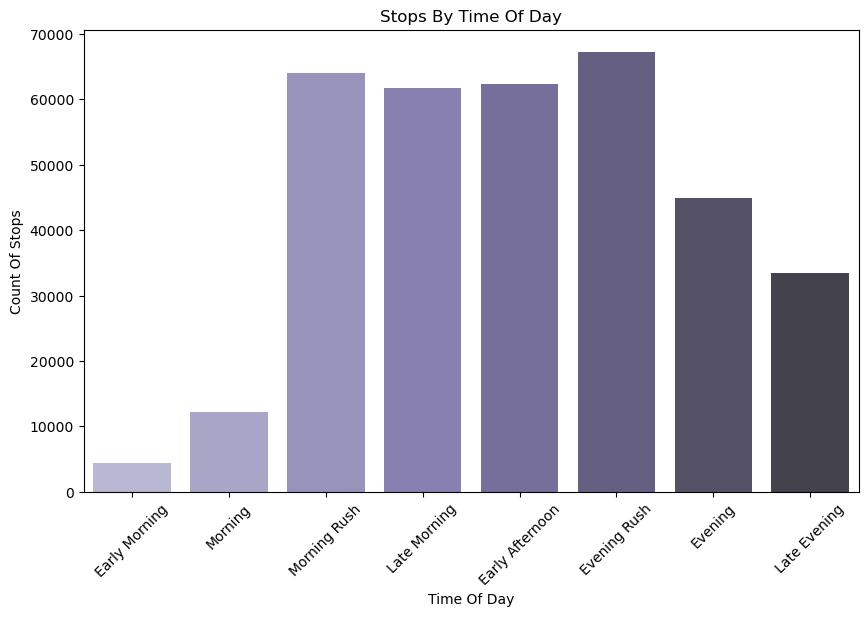

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(data=time_of_day_count,
            x='Time Of Day',
            y='count',
            palette='Purples_d'
             )  
plt.xticks(rotation=45)  
plt.xlabel('Time Of Day')
plt.ylabel('Count Of Stops')
plt.title('Stops By Time Of Day')
plt.savefig("count_of_stops_by_time.png")
plt.show()

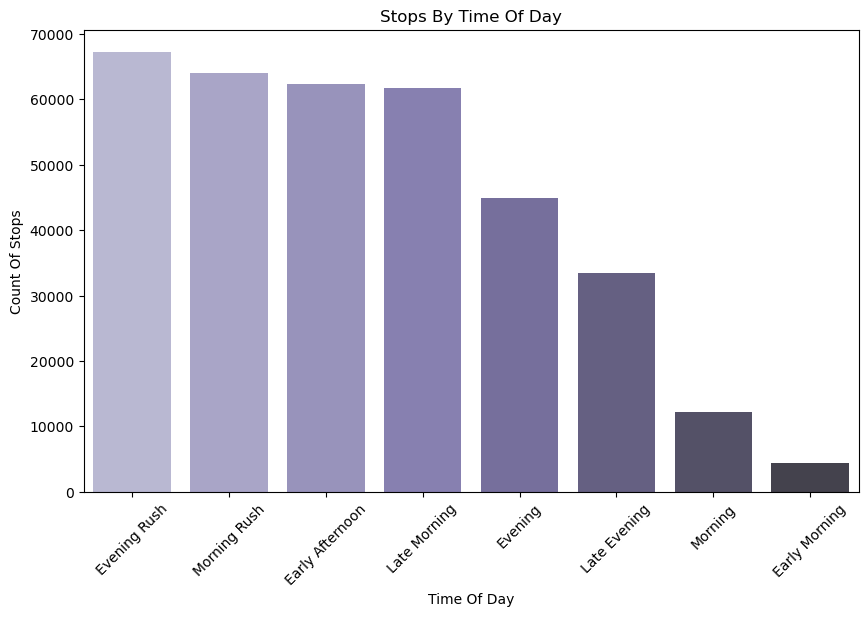

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(data=wego_time_of_day_counts,
            x='time_of_day',
            y='count',
            palette='Purples_d'
            )  
plt.xticks(rotation=45)  
plt.xlabel('Time Of Day')
plt.ylabel('Count Of Stops')
plt.title('Stops By Time Of Day')
plt.savefig("count_of_stops_by_time.png")
plt.show()

In [104]:
(67274/350329)*100 ##evening rush

19.20309195070919

In [105]:
(63985/350329)*100 ##morning_rush

18.26426016687171

In [106]:
(62422/350329)*100 ##early afternoon

17.81810812122319

In [107]:
(61722/350329)*100 ##late morning

17.618295944669153

In [108]:
(44910/350329)*100 ##evening

12.819378355774145

In [109]:
(33482/350329)*100 ##late evening

9.557301850546201

In [110]:
(12190/350329)*100 ##morning            

3.47958633170534

In [111]:
(4344/350329)*100 ##early morning       

1.2399772785010663

In [112]:
data = [['Early Morning', 1.23], ['Morning', 3.47], ['Morning Rush', 18.26], ['Late Morning', 17.61], ['Early Afternoon', 17.81], ['Evening Rush', 19.20], ['Evening', 12.81],['Late Evening', 9.55] ]
time_of_day_pct = pd.DataFrame(data, columns=['Time Of Day', 'Pct of Routes'])
time_of_day_pct

,Time Of Day,Pct of Routes
0,Early Morning,1.23
1,Morning,3.47
2,Morning Rush,18.26
3,Late Morning,17.61
4,Early Afternoon,17.81
5,Evening Rush,19.20
6,Evening,12.81
7,Late Evening,9.55


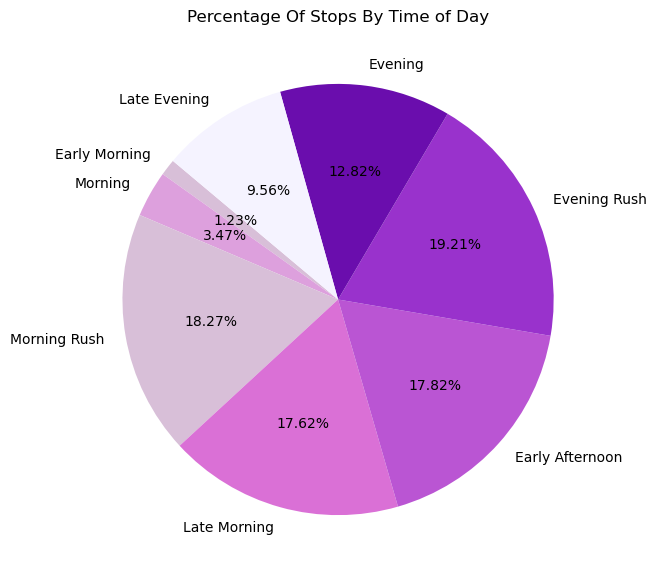

In [113]:
plt.figure(figsize=(10, 7))
colors = ['#d8bfd8','#dda0dd','#d8bfd8','#da70d6','#ba55d3','#9932cc','#6a0dad','#f5f3ff']
plt.pie(time_of_day_pct['Pct of Routes'], labels=time_of_day_pct['Time Of Day'], autopct='%1.2f%%', startangle=140,colors=colors )
plt.title('Percentage Of Stops By Time of Day')
plt.show()

In [114]:
## colors = ['#e0bbff','#d699ff','#cc66ff','#c133ff','#b300ff','#9900cc','#800099','#4d004d'] colors = colors

In [115]:
wego_early_morning = wego_df.loc[wego_df['time_of_day'] == 'early morning']
wego_early_morning

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day


In [116]:
wego_early_morning['ADJUSTED_EARLY_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [117]:
(384/4344)*100

8.83977900552486

In [118]:
wego_early_morning['ADJUSTED_LATE_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [119]:
(819/4344)*100

18.853591160220994

In [120]:
wego_early_morning['ADJUSTED_ONTIME_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [121]:
(2928/4344)*100

67.40331491712708

In [122]:
wego_morning = wego_df.loc[wego_df['time_of_day'] == 'morning']
wego_morning

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day


In [123]:
wego_morning['ADJUSTED_EARLY_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [124]:
(441/12190)*100

3.6177194421657095

In [125]:
wego_morning['ADJUSTED_LATE_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [126]:
(465/12190)*100

3.814602132895816

In [127]:
wego_morning['ADJUSTED_ONTIME_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [128]:
(10864/12190)*100

89.12223133716161

In [129]:
wego_morning_rush = wego_df.loc[wego_df['time_of_day'] == 'morning rush']
wego_morning_rush

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day


In [130]:
wego_morning_rush['ADJUSTED_EARLY_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [131]:
(1483/63985)*100

2.3177307181370637

In [132]:
wego_morning_rush['ADJUSTED_LATE_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [133]:
(9666/63985)*100

15.106665624755802

In [134]:
wego_morning_rush['ADJUSTED_ONTIME_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [135]:
(50786/63985)*100

79.3717277486911

In [136]:
wego_late_morning = wego_df.loc[wego_df['time_of_day'] == 'late morning']
wego_late_morning

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day


In [137]:
wego_late_morning['ADJUSTED_EARLY_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [138]:
(1915/61722)*100

3.1026214315803116

In [139]:
wego_late_morning['ADJUSTED_LATE_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [140]:
(7032/61722)*100

11.393020316904831

In [141]:
wego_late_morning['ADJUSTED_ONTIME_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [142]:
(51120/61722)*100

82.82298046077574

In [143]:
wego_early_afternoon = wego_df.loc[wego_df['time_of_day'] == 'early afternoon']
wego_early_afternoon

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day


In [144]:
wego_early_afternoon['ADJUSTED_EARLY_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [145]:
(1725/62422)*100

2.763448784082535

In [146]:
wego_early_afternoon['ADJUSTED_LATE_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [147]:
(9533/62422)*100

15.271859280381916

In [148]:
wego_early_afternoon['ADJUSTED_ONTIME_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [149]:
(49528/62422)*100

79.34382108871873

In [150]:
wego_evening_rush = wego_df.loc[wego_df['time_of_day'] == 'evening rush']
wego_evening_rush

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day


In [151]:
wego_evening_rush['ADJUSTED_EARLY_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [152]:
(1937/67274)*100

2.879269851651455

In [153]:
wego_evening_rush['ADJUSTED_LATE_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [154]:
(17131/67274)*100

25.464518238844132

In [155]:
wego_evening_rush['ADJUSTED_ONTIME_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [156]:
(45684/67274)*100

67.90736391473675

In [157]:
wego_evening = wego_df.loc[wego_df['time_of_day'] == 'evening']
wego_evening

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day


In [158]:
wego_evening['ADJUSTED_EARLY_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [159]:
(1011/44910)*100

2.2511690046760187

In [160]:
wego_evening['ADJUSTED_LATE_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [161]:
(9477/44910)*100

21.102204408817634

In [162]:
wego_evening['ADJUSTED_ONTIME_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [163]:
(32590/44910)*100

72.56735693609441

In [164]:
wego_late_evening = wego_df.loc[wego_df['time_of_day'] == 'late evening']
wego_late_evening

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day


In [165]:
wego_late_evening['ADJUSTED_EARLY_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [166]:
(879/33482)*100

2.6252912012424585

In [167]:
wego_late_evening['ADJUSTED_LATE_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [168]:
(4915/33482)*100

14.679529299325011

In [169]:
wego_late_evening['ADJUSTED_ONTIME_COUNT'].value_counts()

Series([], Name: count, dtype: int64)

In [170]:
(26548/33482)*100

79.29036497222388

In [171]:
data = [['Early Morning', 8.83], ['Morning', 3.47], ['Morning Rush', 2.31], ['Late Morning', 3.10], ['Early Afternoon', 2.76], ['Evening Rush', 2.87], ['Evening', 2.25],['Late Evening', 2.62] ]
time_of_day_adjusted_early_count_pct = pd.DataFrame(data, columns=['Time Of Day', 'Pct Adjusted Early Count'])
time_of_day_adjusted_early_count_pct

,Time Of Day,Pct Adjusted Early Count
0,Early Morning,8.83
1,Morning,3.47
2,Morning Rush,2.31
3,Late Morning,3.10
4,Early Afternoon,2.76
5,Evening Rush,2.87
6,Evening,2.25
7,Late Evening,2.62


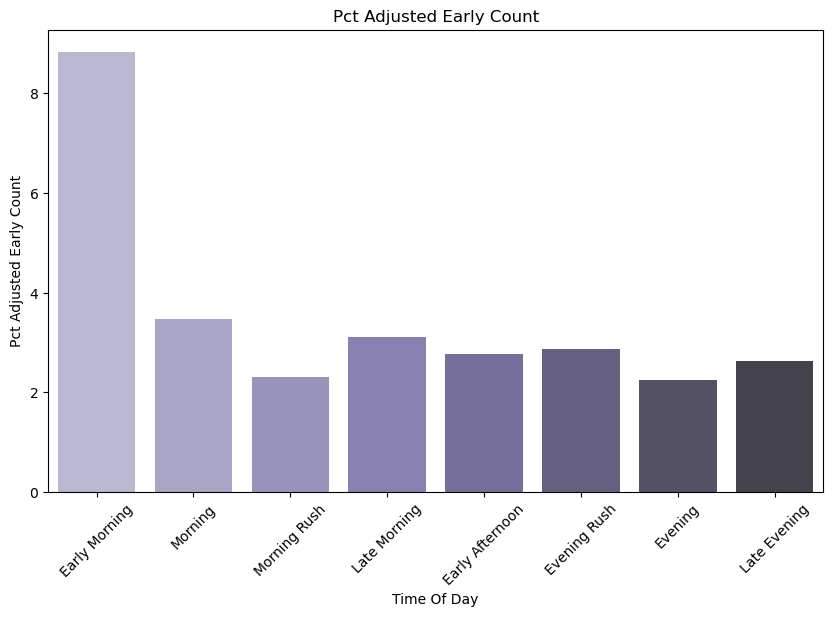

In [172]:
plt.figure(figsize=(10, 6))
sns.barplot(data=time_of_day_adjusted_early_count_pct,
            x='Time Of Day',
            y='Pct Adjusted Early Count',
            palette='Purples_d')  
plt.xticks(rotation=45)  
plt.xlabel('Time Of Day')
plt.ylabel('Pct Adjusted Early Count')
plt.title('Pct Adjusted Early Count')
plt.show()

In [173]:
data = [['Early Morning', 18.85], ['Morning', 3.81], ['Morning Rush', 15.10], ['Late Morning', 11.39], ['Early Afternoon', 15.27], ['Evening Rush', 25.46], ['Evening', 21.10],['Late Evening', 14.67] ]
time_of_day_adjusted_late_count_pct = pd.DataFrame(data, columns=['Time Of Day', 'Pct Adjusted Late Count'])
time_of_day_adjusted_late_count_pct

,Time Of Day,Pct Adjusted Late Count
0,Early Morning,18.85
1,Morning,3.81
2,Morning Rush,15.10
3,Late Morning,11.39
4,Early Afternoon,15.27
5,Evening Rush,25.46
6,Evening,21.10
7,Late Evening,14.67


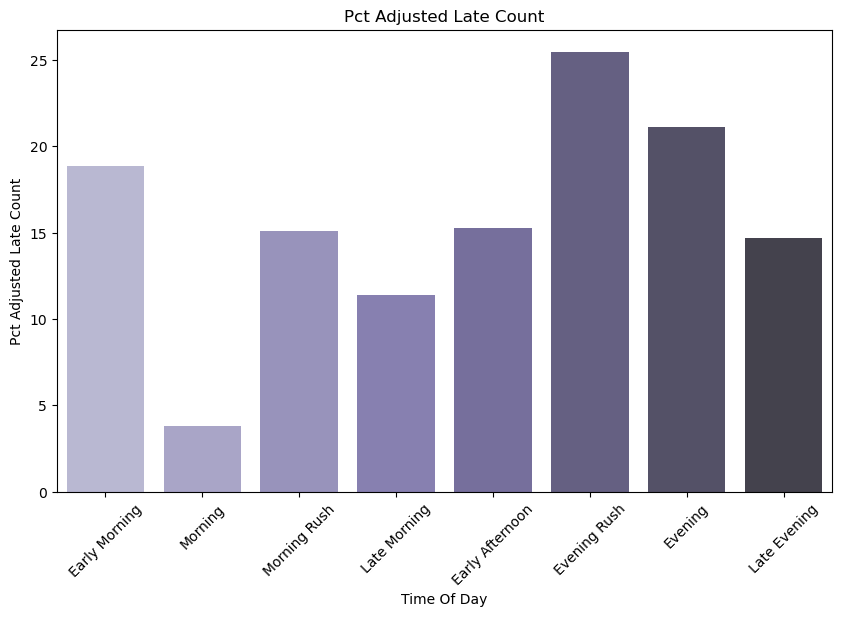

In [174]:
plt.figure(figsize=(10, 6))
sns.barplot(data=time_of_day_adjusted_late_count_pct,
            x='Time Of Day',
            y='Pct Adjusted Late Count',
            palette='Purples_d')  
plt.xticks(rotation=45)  
plt.xlabel('Time Of Day')
plt.ylabel('Pct Adjusted Late Count')
plt.title('Pct Adjusted Late Count')
plt.show()

In [175]:
data = [['Early Morning', 67.40], ['Morning', 89.12], ['Morning Rush', 79.37], ['Late Morning', 82.82], ['Early Afternoon', 79.34], ['Evening Rush', 67.90], ['Evening', 72.56],['Late Evening', 79.29] ]
time_of_day_adjusted_ontime_pct = pd.DataFrame(data, columns=['Time Of Day', 'Pct Adjusted Ontime Count'])
time_of_day_adjusted_ontime_pct

,Time Of Day,Pct Adjusted Ontime Count
0,Early Morning,67.40
1,Morning,89.12
2,Morning Rush,79.37
3,Late Morning,82.82
4,Early Afternoon,79.34
5,Evening Rush,67.90
6,Evening,72.56
7,Late Evening,79.29


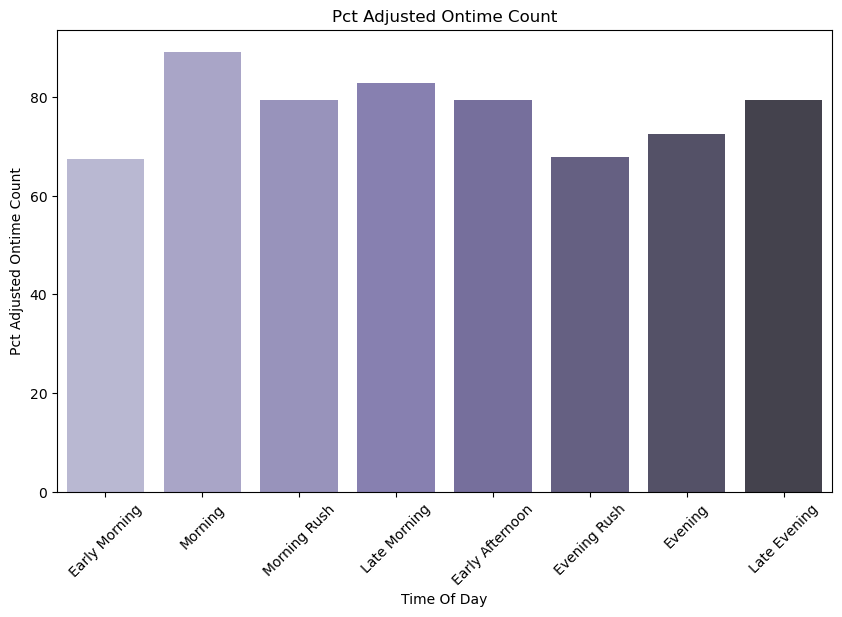

In [176]:
plt.figure(figsize=(10, 6))
sns.barplot(data=time_of_day_adjusted_ontime_pct,
            x='Time Of Day',
            y='Pct Adjusted Ontime Count',
            palette='Purples_d')  
plt.xticks(rotation=45)  
plt.xlabel('Time Of Day')
plt.ylabel('Pct Adjusted Ontime Count')
plt.title('Pct Adjusted Ontime Count')
plt.show()

In [177]:
days_of_the_week_merge = pd.merge(adjusted_early_count,adjusted_late_count,
                                 left_on = 'Day', right_on = 'Day', 
                               how = 'left') 
days_of_the_week_merge

,Day,Adjusted Early Count,Adjusted Late Count
0,Monday,3.38,12.22
1,Tuesday,2.88,16.40
2,Wednesday,2.79,17.59
3,Thursday,2.68,18.25
4,Friday,2.65,21.18
5,Saturday,2.18,17.99
6,Sunday,2.83,11.21


In [178]:
days_of_the_week_merge_total = pd.merge(days_of_the_week_merge, adjusted_ontime_count,
                                        left_on = 'Day', right_on = 'Day', 
                                        how = 'left') 
days_of_the_week_merge_total

,Day,Adjusted Early Count,Adjusted Late Count,Adjusted Ontime Count
0,Monday,3.38,12.22,82.08
1,Tuesday,2.88,16.40,77.87
2,Wednesday,2.79,17.59,76.90
3,Thursday,2.68,18.25,75.35
4,Friday,2.65,21.18,71.78
5,Saturday,2.18,17.99,77.23
6,Sunday,2.83,11.21,81.30


<Figure size 1200x800 with 0 Axes>

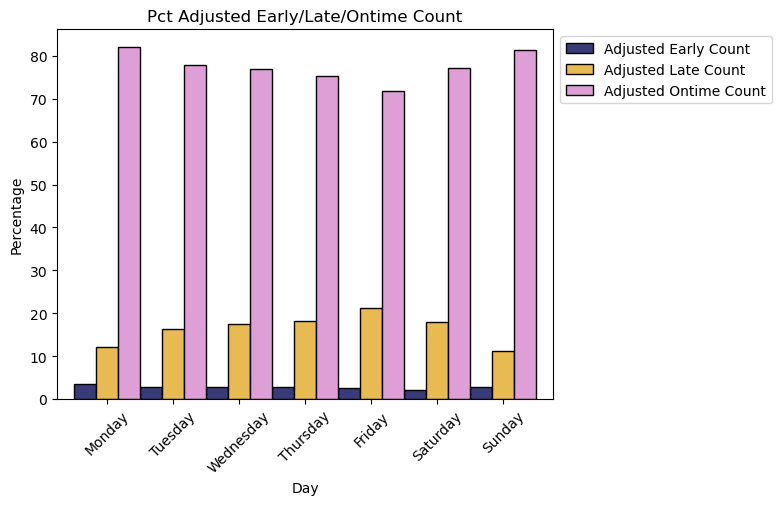

In [179]:
plt.figure(figsize=(12,8))
days_of_the_week_merge_total.plot(kind = 'bar', x='Day',
                                  stacked = False,
                                  colormap='tab20b',
                                  edgecolor = 'black',
                                  width = 1,
                                  ),
plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Pct Adjusted Early/Late/Ontime Count')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left');  

In [180]:
time_of_the_week_merge = pd.merge(time_of_day_adjusted_early_count_pct, time_of_day_adjusted_late_count_pct,
                                  left_on = 'Time Of Day', right_on = 'Time Of Day')
time_of_the_week_merge

,Time Of Day,Pct Adjusted Early Count,Pct Adjusted Late Count
0,Early Morning,8.83,18.85
1,Morning,3.47,3.81
2,Morning Rush,2.31,15.10
3,Late Morning,3.10,11.39
4,Early Afternoon,2.76,15.27
5,Evening Rush,2.87,25.46
6,Evening,2.25,21.10
7,Late Evening,2.62,14.67


In [181]:
time_of_the_week_merge_total = pd.merge(time_of_the_week_merge, time_of_day_adjusted_ontime_pct,
                                  left_on = 'Time Of Day', right_on = 'Time Of Day')
time_of_the_week_merge_total

,Time Of Day,Pct Adjusted Early Count,Pct Adjusted Late Count,Pct Adjusted Ontime Count
0,Early Morning,8.83,18.85,67.40
1,Morning,3.47,3.81,89.12
2,Morning Rush,2.31,15.10,79.37
3,Late Morning,3.10,11.39,82.82
4,Early Afternoon,2.76,15.27,79.34
5,Evening Rush,2.87,25.46,67.90
6,Evening,2.25,21.10,72.56
7,Late Evening,2.62,14.67,79.29


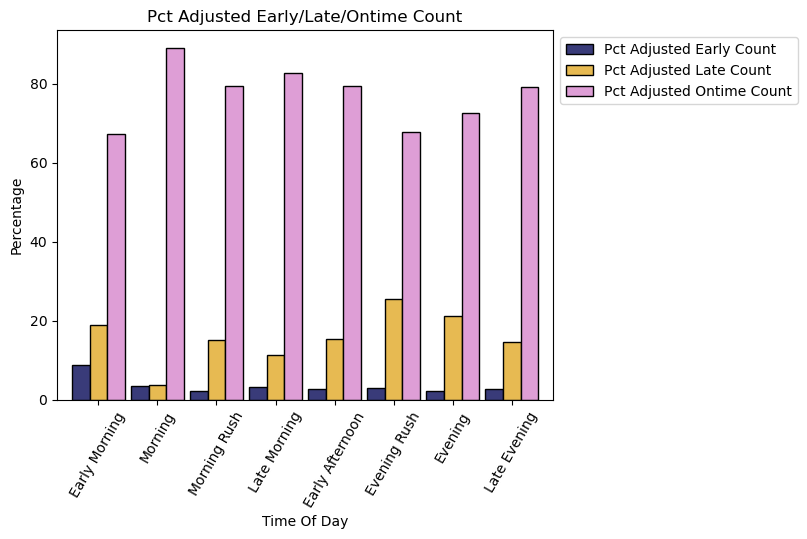

In [182]:
time_of_the_week_merge_total.plot(kind = 'bar', x='Time Of Day',
                                  stacked = False,
                                  colormap='tab20b',
                                  edgecolor = 'black',
                                  width = 0.9,
                                  )
plt.xlabel('Time Of Day')
plt.ylabel('Percentage')
plt.title('Pct Adjusted Early/Late/Ontime Count')
plt.xticks(rotation = 60)
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left');  
plt.savefig('test.jpg')

In [183]:
## FRIDAY EVENING ROUTES

In [184]:
wego_df

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,6.500000,NaN,2023-08-01,Tuesday,04:42:00,Morning
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-01,Tuesday,04:46:00,Morning
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-01,Tuesday,04:54:00,Morning
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,2023-08-01,Tuesday,05:10:00,Morning
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,1,0,0.0,0,12.866666,5.0,2023-08-01,Tuesday,05:15:00,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,2023-09-30,Saturday,22:23:00,Late Evening
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,NaN,0,0.000000,NaN,2023-09-30,Saturday,22:38:00,Late Evening
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-09-30,Saturday,22:45:00,Late Evening
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,2023-09-30,Saturday,22:59:00,Late Evening


In [185]:
wego_friday_evening_rush = wego_df.loc[wego_df['DAY']== 'Friday']
wego_friday_evening_rush

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day
19383,120230804,1,99559347,2023-08-04,22,2200,1040,349935,0,TO DOWNTOWN,...,1,0,0.0,0,5.416666,NaN,2023-08-04,Friday,04:42:00,Morning
19384,120230804,1,99559348,2023-08-04,22,2200,1040,349935,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-04,Friday,04:46:00,Morning
19385,120230804,1,99559349,2023-08-04,22,2200,1040,349935,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-04,Friday,04:54:00,Morning
19386,120230804,1,99559350,2023-08-04,22,2200,1040,349935,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,2023-08-04,Friday,05:10:00,Morning
19387,120230804,1,99559351,2023-08-04,22,2200,1040,349936,0,FROM DOWNTOWN,...,1,0,0.0,0,14.600000,5.0,2023-08-04,Friday,05:15:00,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346166,120230929,1,100386592,2023-09-29,50,9302,2423,354069,0,TO DOWNTOWN,...,0,0,NaN,0,3.183333,NaN,2023-09-29,Friday,15:18:00,Evening Rush
346167,120230929,1,100386719,2023-09-29,50,9950,2530,354098,0,TO DOWNTOWN,...,1,0,0.0,0,36.883333,NaN,2023-09-29,Friday,15:20:00,Evening Rush
346168,120230929,1,100386720,2023-09-29,50,9950,2530,354098,0,TO DOWNTOWN,...,1,0,NaN,0,4.416666,NaN,2023-09-29,Friday,15:37:00,Evening Rush
346169,120230929,1,100386749,2023-09-29,56,9975,3120,354106,0,TO DOWNTOWN,...,0,0,0.0,0,10.433333,NaN,2023-09-29,Friday,15:20:00,Evening Rush


In [186]:
wego_friday_evening_rush1 = wego_friday_evening_rush.loc[wego_friday_evening_rush['time_of_day'] == 'Evening Rush']
wego_friday_evening_rush1

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day
19447,120230804,1,99559411,2023-08-04,22,2200,611,349954,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,2023-08-04,Friday,15:00:00,Evening Rush
19448,120230804,1,99559412,2023-08-04,22,2200,611,349955,0,FROM DOWNTOWN,...,1,0,0.0,0,14.266666,10.0,2023-08-04,Friday,15:10:00,Evening Rush
19449,120230804,1,99559413,2023-08-04,22,2200,611,349955,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-04,Friday,15:23:00,Evening Rush
19450,120230804,1,99559414,2023-08-04,22,2200,611,349955,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-04,Friday,15:27:00,Evening Rush
19451,120230804,1,99559415,2023-08-04,22,2200,611,349955,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-04,Friday,15:37:00,Evening Rush
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346166,120230929,1,100386592,2023-09-29,50,9302,2423,354069,0,TO DOWNTOWN,...,0,0,NaN,0,3.183333,NaN,2023-09-29,Friday,15:18:00,Evening Rush
346167,120230929,1,100386719,2023-09-29,50,9950,2530,354098,0,TO DOWNTOWN,...,1,0,0.0,0,36.883333,NaN,2023-09-29,Friday,15:20:00,Evening Rush
346168,120230929,1,100386720,2023-09-29,50,9950,2530,354098,0,TO DOWNTOWN,...,1,0,NaN,0,4.416666,NaN,2023-09-29,Friday,15:37:00,Evening Rush
346169,120230929,1,100386749,2023-09-29,56,9975,3120,354106,0,TO DOWNTOWN,...,0,0,0.0,0,10.433333,NaN,2023-09-29,Friday,15:20:00,Evening Rush


In [187]:
wego_friday_evening_rush1['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    7878
1    3549
Name: count, dtype: int64

In [188]:
(3549/11427)*100

31.058020477815703

In [189]:
wego_monday_morning = wego_df.loc[wego_df['DAY']== 'Monday']
wego_monday_morning 

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day
33705,120230807,1,99619492,2023-08-07,22,2200,1040,349935,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-07,Monday,04:42:00,Morning
33706,120230807,1,99619493,2023-08-07,22,2200,1040,349935,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-07,Monday,04:46:00,Morning
33707,120230807,1,99619494,2023-08-07,22,2200,1040,349935,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-07,Monday,04:54:00,Morning
33708,120230807,1,99619495,2023-08-07,22,2200,1040,349935,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,2023-08-07,Monday,05:10:00,Morning
33709,120230807,1,99619496,2023-08-07,22,2200,1040,349936,0,FROM DOWNTOWN,...,1,0,0.0,0,9.666666,5.0,2023-08-07,Monday,05:15:00,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320119,120230925,1,100254836,2023-09-25,50,9302,2423,354069,0,TO DOWNTOWN,...,1,0,NaN,0,2.766666,NaN,2023-09-25,Monday,15:18:00,Evening Rush
320120,120230925,1,100254963,2023-09-25,50,9950,2497,354098,0,TO DOWNTOWN,...,1,0,0.0,0,38.233333,NaN,2023-09-25,Monday,15:20:00,Evening Rush
320121,120230925,1,100254964,2023-09-25,50,9950,2497,354098,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,2023-09-25,Monday,15:37:00,Evening Rush
320122,120230925,1,100254993,2023-09-25,56,9975,2560,354106,0,TO DOWNTOWN,...,1,0,0.0,0,56.316666,NaN,2023-09-25,Monday,15:20:00,Evening Rush


In [190]:
wego_monday_morning1 = wego_monday_morning.loc[wego_monday_morning['time_of_day'] == 'Morning']
wego_monday_morning1 

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day
33705,120230807,1,99619492,2023-08-07,22,2200,1040,349935,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-07,Monday,04:42:00,Morning
33706,120230807,1,99619493,2023-08-07,22,2200,1040,349935,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-07,Monday,04:46:00,Morning
33707,120230807,1,99619494,2023-08-07,22,2200,1040,349935,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-07,Monday,04:54:00,Morning
33708,120230807,1,99619495,2023-08-07,22,2200,1040,349935,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,2023-08-07,Monday,05:10:00,Morning
33709,120230807,1,99619496,2023-08-07,22,2200,1040,349936,0,FROM DOWNTOWN,...,1,0,0.0,0,9.666666,5.0,2023-08-07,Monday,05:15:00,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,120230925,1,100252654,2023-09-25,7,700,1202,353253,0,TO DOWNTOWN,...,1,0,0.0,0,10.250000,6.0,2023-09-25,Monday,05:46:00,Morning
319790,120230925,1,100252655,2023-09-25,7,700,1202,353253,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-09-25,Monday,05:54:00,Morning
319843,120230925,1,100252812,2023-09-25,7,701,341,353345,0,FROM DOWNTOWN,...,0,0,0.0,0,8.550000,NaN,2023-09-25,Monday,05:40:00,Morning
319844,120230925,1,100252813,2023-09-25,7,701,341,353345,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-09-25,Monday,05:53:00,Morning


In [191]:
wego_monday_morning1['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    1685
1      73
Name: count, dtype: int64

In [192]:
(73/1758)*100

4.152445961319681

In [193]:
early = wego_df.loc[wego_df['time_of_day'] == 'Early Morning']
early

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_1,DAY,SCHEDULED_TIME_1,time_of_day
119,120230801,1,99458009,2023-08-01,22,2200,2689,345139,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,2023-08-01,Tuesday,00:08:00,Early Morning
120,120230801,1,99458010,2023-08-01,22,2200,2689,345140,0,FROM DOWNTOWN,...,1,0,0.0,0,13.883333,NaN,2023-08-01,Tuesday,00:15:00,Early Morning
121,120230801,1,99458011,2023-08-01,22,2200,2689,345140,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-01,Tuesday,00:26:00,Early Morning
122,120230801,1,99458012,2023-08-01,22,2200,2689,345140,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,2023-08-01,Tuesday,00:30:00,Early Morning
123,120230801,1,99458013,2023-08-01,22,2200,2689,345140,0,FROM DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,2023-08-01,Tuesday,00:37:00,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349725,120230930,2,100405797,2023-09-30,56,5601,2399,352818,0,FROM DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,2023-09-30,Saturday,00:51:00,Early Morning
350253,120230930,2,100406537,2023-09-30,7,701,2531,353394,0,TO DOWNTOWN,...,0,0,NaN,0,0.000000,NaN,2023-09-30,Saturday,00:08:00,Early Morning
350254,120230930,2,100406538,2023-09-30,7,701,2531,353395,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,2023-09-30,Saturday,00:15:00,Early Morning
350255,120230930,2,100406539,2023-09-30,7,701,2531,353395,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,2023-09-30,Saturday,00:29:00,Early Morning


In [194]:
early['ROUTE_ABBR'].value_counts().reset_index()

,ROUTE_ABBR,count
0,52,776
1,23,676
2,56,628
3,55,597
4,50,523
5,3,520
6,22,416
7,7,208


In [195]:
wego_df.DATE.describe()

count         350329
unique            61
top       2023-09-15
freq            6541
Name: DATE, dtype: object